# Assignment 2 - DIY LINEAR REGRESSOR!

*This assignment is a part of the project ["Customer Churn Analysis: From Data To Strategy"]*


1.   ## Part-1
In this part, you'll build your own linear regression from scratch by 2 methods that were discuseed in class.

  * OLS (Ordinary Least Square) - This method directly calculates the values of the coefficients in equation y=mx+c.
  * Gradient Descent - This method uses an iterative approach to calculate the values of the coefficients. You'll have to calculate the values of both m and b.
2.   ## Part-2
In this part, you'll get predictions from the model you just built. You'll then evaluate the predictions by following metrics:

    * [R2 Score](https://www.investopedia.com/terms/r/r-squared.asp)
    * [MEAN ABSOLUTE ERROR and ROOT MEAN SQUARED ERROR](https://towardsdatascience.com/what-are-rmse-and-mae-e405ce230383)
3.  ## Part-3
In this part, you'll have to answer some subjective questions.







If you are stuck or have any doubts, please feel free to put your queries on the Whatsapp group.


Deadline : **31 May, 11:59 pm**


# Import necessary libraries
Feel free to modify it as per your requirements.

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Part-1


### Linear Regressor with OLS method

In [169]:

class MyLRFromOLS:
    def __init__(self):
        self.m = None
        self.b = None

    def fit(self, X_train, y_train):
        # Convert data to numpy arrays for easier manipulation
        X_train = np.array(X_train).flatten()
        y_train = np.array(y_train)

        # Calculate values of m and b
        n = len(X_train)
        numerator = (n * np.sum(X_train * y_train)) - np.sum(X_train) * np.sum(y_train)
        denominator = (n * np.sum(X_train**2)) - (np.sum(X_train))**2

        self.m = numerator / denominator
        self.b = (np.sum(y_train) - self.m * np.sum(X_train)) / n

    def predict(self, X_test):
        # Convert X_test to numpy array if it's not already
        X_test = np.array(X_test).flatten()
        return self.m * X_test + self.b

    def get_coeff(self):
        return self.m, self.b

In [170]:
#load dataset
table=pd.read_csv("tvmarketing.csv")


In [171]:
# Separate input and output columns
X=table['TV']
y=table['Sales']

In [172]:
# Train test split of 80/20. Try changing the ratio and see what results you get

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


#### scaling the data


In [173]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)


In [174]:
X_test_scaled.shape

(40, 1)

  ### Prediction time

In [175]:
olslr = MyLRFromOLS()


In [176]:
olslr.fit(X_train_scaled,y_train)

In [177]:
olslr_pred = olslr.predict(X_test_scaled)

In [178]:

#View predictions
olslr_pred


array([15.78344456, 10.27007924,  9.51467999, 18.7420916 , 15.31656586,
       16.70146447, 10.03401697, 20.34731499, 10.5061415 , 21.81614685,
        7.81503169, 17.98669235, 11.68120699,  6.9756992 , 18.23324627,
        7.46880704,  7.88322746, 14.51395416, 17.56178028, 17.27325973,
       18.54275013, 20.35780665,  9.58287576,  8.50223517, 18.86799147,
       15.40049911, 15.75196959, 10.18614599, 18.48504602, 18.31717952,
       21.08173092, 13.44380523, 17.04768912, 13.71134246,  6.84979933,
       12.32644385, 18.12308388, 19.59716157, 20.47846069, 16.14540669])

In [179]:
#Get values of m and b
olslr.get_coeff()

(4.484453920009182, 14.167499999999999)

### Linear Regressor with gradient descent


In [180]:
import numpy as np

class MyLRFromGD:

    def __init__(self, learning_rate, epochs):
        self.m = 0.5  # assign random value
        self.b = 100  # assign random value
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X_train, y_train):
        # calculate b and m using GD
        X_train = np.array(X_train).reshape(-1, 1)
        y_train = np.array(y_train).reshape(-1, 1)
        n = len(X_train)
        for i in range(self.epochs):
            y_pred = self.m * X_train + self.b
            # Calculate slope wrt b and m
            loss_slope_b = (-2/n) * np.sum(y_train - y_pred)
            loss_slope_m = (-2/n) * np.sum(X_train * (y_train - y_pred))

            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)

    def predict(self, X_test):
        X_test = np.array(X_test).reshape(-1, 1)
        return self.m * X_test + self.b

    def get_coeff(self):
        # Write code to get values of m and b
        return self.m, self.b


### Prediction Time
Since we have already split the dataset, we're not going to repeat it again.

In [181]:
#Check with different values of learning_rate and epochs for model convergence
learning_rate=0.01
epochs=1000
gdlr = MyLRFromGD(learning_rate,epochs)

In [182]:
gdlr.fit(X_train_scaled,y_train)

In [183]:
gdlr_pred = gdlr.predict(X_test_scaled)

In [184]:
# View predictions
gdlr_pred

array([[15.7834447 ],
       [10.27007939],
       [ 9.51468014],
       [18.74209173],
       [15.316566  ],
       [16.70146461],
       [10.03401712],
       [20.34731513],
       [10.50614165],
       [21.81614699],
       [ 7.81503185],
       [17.98669249],
       [11.68120714],
       [ 6.97569935],
       [18.23324641],
       [ 7.46880719],
       [ 7.88322761],
       [14.5139543 ],
       [17.56178042],
       [17.27325987],
       [18.54275027],
       [20.35780678],
       [ 9.58287591],
       [ 8.50223533],
       [18.86799161],
       [15.40049925],
       [15.75196973],
       [10.18614614],
       [18.48504616],
       [18.31717966],
       [21.08173106],
       [13.44380537],
       [17.04768926],
       [13.71134261],
       [ 6.84979948],
       [12.32644399],
       [18.12308402],
       [19.59716171],
       [20.47846083],
       [16.14540683]])

In [185]:
# Get values of m and b
m, b = gdlr.get_coeff()
print(f"Coefficients: m = {m}, b = {b}")

Coefficients: m = 4.484453913303477, b = 14.167500144453294


In [186]:
# Compare values of m and b obtained from both methods

# Part-2

### R2 Score
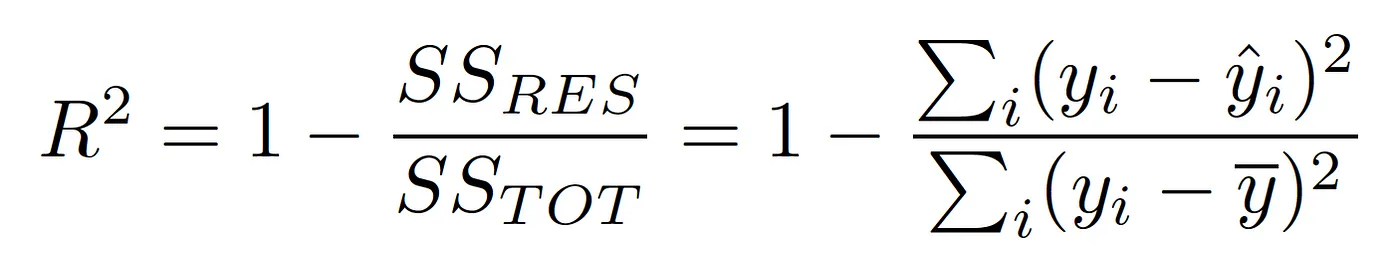

### MEAN ABSOLUTE ERROR
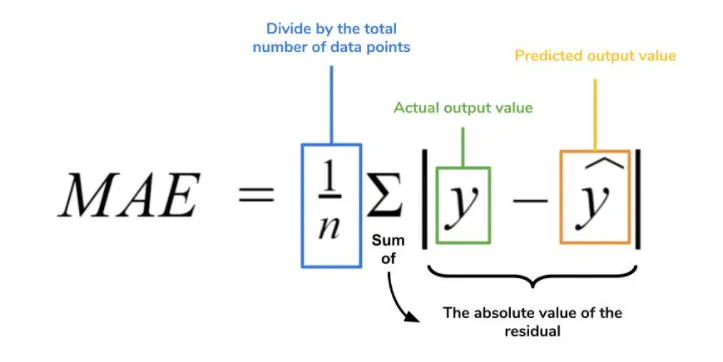

### ROOT MEAN SQUARED ERROR
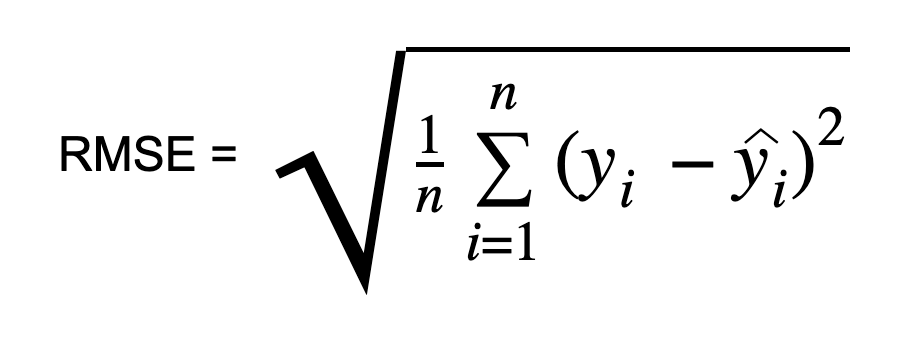

### Evaluation time
Let's see how does both of our models perform.

In [187]:
# Implement R2 Score, MAE and RMSE

class evaluate:

    def __init__(self, y_pred, y_test):
        self.y_pred = np.array(y_pred)
        self.y_test = np.array(y_test)

    def r2score(self):
        # Calculate the R^2 score
        res = np.sum((self.y_test - self.y_pred) ** 2)
        total = np.sum((self.y_test - np.mean(self.y_test)) ** 2)
        r2 = 1 - (res / total)
        return r2

    def mae(self):
        # Calculate the Mean Absolute Error
        mean_absolute_error = np.mean(np.abs(self.y_test - self.y_pred))
        return mean_absolute_error

    def rmse(self):
        # Calculate the Root Mean Squared Error
        rmse = np.sqrt(np.mean((self.y_test - self.y_pred) ** 2))
        return rmse



In [188]:
# First calculate all the metrics for olslr_pred
evaluation = evaluate(y_test,olslr_pred)
r2 = evaluation.r2score()
meanabserror=evaluation.mae()
meansquare=evaluation.rmse()
print("R-squared:", r2)
print("Mean absolute error:",meanabserror)
print("Root mean squared error:",meansquare)

R-squared: 0.11992385717310161
Mean absolute error: 3.2353682995006396
Root mean squared error: 4.21816233753514


In [189]:
# Now for gdlr_pred

In [190]:
evaluation = evaluate(y_test,gdlr_pred)
r2 = evaluation.r2score()
meanabserror=evaluation.mae()
meansquare=evaluation.rmse()
print("R-squared:", r2)
print("Mean absolute error:",meanabserror)
print("Root mean squared error:",meansquare)

R-squared: -79.03603942053724
Mean absolute error: 5.264541474495719
Root mean squared error: 6.36027602943893


In [191]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, gdlr_pred)
mae = mean_absolute_error(y_test, gdlr_pred)
mse = mean_squared_error(y_test, gdlr_pred)

# Print results
print(f"R2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

R2 Score: 0.04217975794240081
Mean Absolute Error: 3.2353683260595405
Mean Squared Error: 17.792893849194375


In [192]:
r2 = r2_score(y_test, olslr_pred)
mae = mean_absolute_error(y_test, gdlr_pred)
mse = mean_squared_error(y_test, gdlr_pred)

# Print results
print(f"R2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

R2 Score: 0.042179776427879845
Mean Absolute Error: 3.2353683260595405
Mean Squared Error: 17.792893849194375


# Part-3
In this part you'll have to answer the questions provided in the below google form:

[Questions](https://forms.gle/2KfpQNvmf5fd9MTw9)

**After Submitting the form, you are required to paste the screenshot of the form.**

## Steps to add screenshot:


1.   Take the screenshot of the submitted form.
2.   Now create a text block below this block in whichever IDE you are using, for example, if you are using VS Code, you will get 2 options below and above each block, Code and Markdown, chose the **Markdown** one.
3.   Now insert the image and run the cell.

### Voila!

